In [5]:
import numpy as np
import glob
import time 
import datetime
import os
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
warnings.filterwarnings('ignore')

# Предобработка

In [23]:
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
filename = 'semeion.data'
df = pd.read_csv(filename, sep=' ', header=None)

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,NaN
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,NaN
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,NaN
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,NaN


In [26]:
def fromOneHot(row):
    return tf.argmax(row, axis=0).numpy()

In [27]:
data = df.iloc[:, :-11]
target = df.iloc[:, 256:-1]

In [28]:
target

,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1588,0,0,0,0,0,0,0,0,0,1
1589,0,0,0,0,0,0,0,0,0,1
1590,0,0,0,0,0,0,0,0,0,1
1591,0,0,0,0,0,0,0,0,0,1


In [29]:
data['target'] = target.apply (lambda row: fromOneHot(row), axis=1)

In [30]:
data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9


In [31]:
def show_image(X, y, index):
    plt.imshow(np.reshape(X.iloc[index].to_numpy(), (16, 16)))
    plt.xlabel(names[int(target.iloc[index].values[0])])
    plt.show()

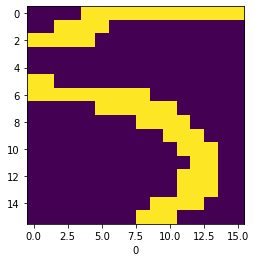

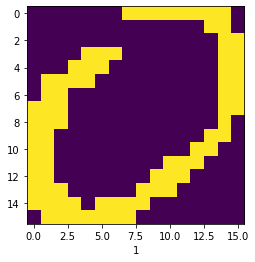

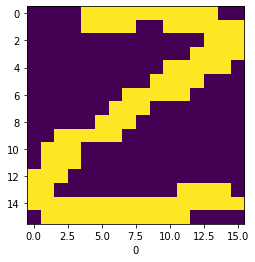

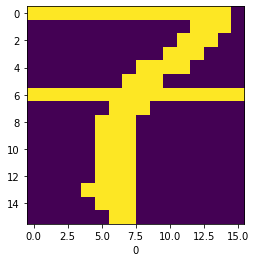

In [32]:
for i in [100, 200, 450, 1500]:
    show_image(data.iloc[:, :-1], data[['target']], i)

In [33]:
X = data.iloc[:, :-1].to_numpy()
X.shape

(1593, 256)

In [34]:
y = data.iloc[:, -1].to_numpy()
y.shape

(1593,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

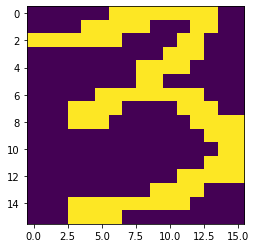

In [37]:
plt.imshow(X_train[100].reshape(16, 16))

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1274, 256)
(1274, 1)
(319, 256)
(319, 1)


In [39]:
X_train, X_test = X_train / 255, X_test / 255

# Модель sklearn.neural_network.MLPClassifier

In [54]:
clf = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(2048, 1024, 512), verbose=True)

In [55]:
clf.fit(X_train, y_train)

Iteration 1, loss = 2.43779999
Iteration 2, loss = 2.35196486
Iteration 3, loss = 2.27187309
Iteration 4, loss = 2.13055525
Iteration 5, loss = 1.87353551
Iteration 6, loss = 1.51119374
Iteration 7, loss = 1.20156841
Iteration 8, loss = 1.00312833
Iteration 9, loss = 0.79183053
Iteration 10, loss = 0.63864302
Iteration 11, loss = 0.56814425
Iteration 12, loss = 0.51002463
Iteration 13, loss = 0.45530728
Iteration 14, loss = 0.40061727
Iteration 15, loss = 0.35222612
Iteration 16, loss = 0.32696099
Iteration 17, loss = 0.28180963
Iteration 18, loss = 0.25378707
Iteration 19, loss = 0.22744508
Iteration 20, loss = 0.20781368
Iteration 21, loss = 0.18561727
Iteration 22, loss = 0.16883139
Iteration 23, loss = 0.15678946
Iteration 24, loss = 0.14430976
Iteration 25, loss = 0.12486243
Iteration 26, loss = 0.11851075
Iteration 27, loss = 0.11479923
Iteration 28, loss = 0.09780326
Iteration 29, loss = 0.09800874
Iteration 30, loss = 0.09971327
Iteration 31, loss = 0.07485305
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(2048, 1024, 512),
              verbose=True)

In [56]:
y_pred_classes = []
for temp in clf.predict_proba(X_test):
    y_pred_classes.append(np.argmax(temp))

In [57]:
accuracy_score(y_test, y_pred_classes)

0.9090909090909091

# Классы и методы

In [58]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nAccuracy > 0.9. Finish!")
            self.model.stop_training=True

In [59]:
def get_board_callback(name):
    log_dir = "logs/fit/"
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir + name, histogram_freq=1)

In [60]:
def get_check_callback(name):
    checkpoint_name = 'checkpoints/' + name
    return tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_name, save_weights_only=True, verbose=1) # monitor

In [61]:
class Constants:
    DENSE = "dense"
    LEAKY_RELU = "leaky_relu"
    ELU = "elu"
    BATCH_NORM = "batch_norm"
    DROPOUT = "drop_out"

In [62]:
class Architecture:
    def __init__(self, schema):
        self.schema = schema

In [63]:
class Parameters:
    def __init__(self, name, architecutre: Architecture, kernel_regularizer=None,
                 initializer = 'glorot_uniform', optimizer='SGD', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'], has_callbacks=True):
        self.name = name
        self.initializer = initializer
        self.regularizer=kernel_regularizer
        if has_callbacks:
            self.tensorboard_callback = get_board_callback(name)
            self.checkpoint_callbak = get_check_callback(name + ".ckpt")
        self.has_callbacks = has_callbacks
        self.architecture = architecutre
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics

In [64]:
def get_model(parameters: Parameters):
    seq = []
    for temp in parameters.architecture.schema:
        if temp[0] == Constants.DENSE:
            if len(temp) == 4:
                layer = tf.keras.layers.Dense(temp[1], activation=temp[2], kernel_initializer=parameters.initializer, 
                                              kernel_regularizer=parameters.regularizer, 
                                              kernel_constraint=tf.keras.constraints.max_norm(temp[3])) 
                print("Добавлен слой Dense(" + str(temp[1]) + ", activation=" + str(temp[2]) + 
                      ", kernel_regularizer=" + str(parameters.regularizer) + ", max_norm=" + str(temp[3]) + ")")
            elif len(temp) == 3:
                layer = tf.keras.layers.Dense(temp[1], activation=temp[2], kernel_initializer=parameters.initializer, 
                                              kernel_regularizer=parameters.regularizer) 
                print("Добавлен слой Dense(" + str(temp[1]) + ", activation=" + str(temp[2]) + 
                      ", kernel_regularizer=" + str(parameters.regularizer) + ")")
            elif len(temp) == 2:
                layer = tf.keras.layers.Dense(temp[1], kernel_initializer=parameters.initializer, 
                                              kernel_regularizer=parameters.regularizer) 
                print("Добавлен слой Dense(" + str(temp[1]) + 
                      ", kernel_regularizer=" + str(parameters.regularizer) + ")")
            seq.append(layer)
        if temp[0] == Constants.LEAKY_RELU:
            layer = tf.keras.layers.LeakyReLU() 
            seq.append(layer)
            print("Добавлен слой LeakyRelu")
        if temp[0] == Constants.ELU:
            layer = tf.keras.layers.ELU() 
            seq.append(layer)
            print("Добавлен слой ELU")
        if temp[0] == Constants.BATCH_NORM:
            layer = tf.keras.layers.BatchNormalization()
            seq.append(layer)
            print("Добавлен слой Batch Normalization")    
        if temp[0] == Constants.DROPOUT:
            layer = tf.keras.layers.Dropout(temp[1])
            seq.append(layer)
            print("Добавлен слой Dropout")    
    model = tf.keras.models.Sequential(seq)
    model.compile(optimizer=parameters.optimizer, loss=parameters.loss, metrics=parameters.metrics)
    print("Модель " + parameters.name + " создана\n")
    callbacks = []
    if parameters.has_callbacks:
        callbacks = [parameters.tensorboard_callback, parameters.checkpoint_callbak, myCallback()]
    return model, callbacks

In [65]:
def report(X_test, y_test, model, output_dict=False):
    y_pred1 = model.predict(X_test)
    y_pred1_classes = [np.argmax(temp) for temp in y_pred1]
    print(classification_report(y_test, y_pred1_classes))
    return classification_report(y_test, y_pred1_classes, output_dict=output_dict)

In [66]:
def print_accuracy_loss(my_history):
    accuracy = my_history.history['accuracy']
    val_acc = my_history.history['val_accuracy']
    loss = my_history.history['loss']
    val_loss = my_history.history['val_loss']

    epochs = range(len(accuracy))

    plt.plot(epochs, accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss,'r',label='Training loss')
    plt.plot(epochs, val_loss,'b',label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

# Модель 1. Базовая
## SGD, Dense 10, kernel_initializer=RandomNormal

In [69]:
architecture = Architecture([("dense", 10, "softmax")])
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
parameters = Parameters("model1", architecture, initializer=initializer)
model1, callbacks1 = get_model(parameters)

Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model1 создана



Epoch 1/60
40/40 [==============================] - 1s 17ms/step - loss: 2.3000 - accuracy: 0.0947 - val_loss: 2.2994 - val_accuracy: 0.0690

Epoch 00001: saving model to checkpoints/model1.ckpt
Epoch 2/60
40/40 [==============================] - 0s 6ms/step - loss: 2.3002 - accuracy: 0.0939 - val_loss: 2.2995 - val_accuracy: 0.0690

Epoch 00002: saving model to checkpoints/model1.ckpt
Epoch 3/60
40/40 [==============================] - 0s 8ms/step - loss: 2.2993 - accuracy: 0.1173 - val_loss: 2.2996 - val_accuracy: 0.0784

Epoch 00003: saving model to checkpoints/model1.ckpt
Epoch 4/60
40/40 [==============================] - 0s 6ms/step - loss: 2.2989 - accuracy: 0.1130 - val_loss: 2.2998 - val_accuracy: 0.0752

Epoch 00004: saving model to checkpoints/model1.ckpt
Epoch 5/60
40/40 [==============================] - 0s 9ms/step - loss: 2.3020 - accuracy: 0.0983 - val_loss: 2.2999 - val_accuracy: 0.0752

Epoch 00005: saving model to checkpoints/model1.ckpt
Epoch 6/60
40/40 [===========

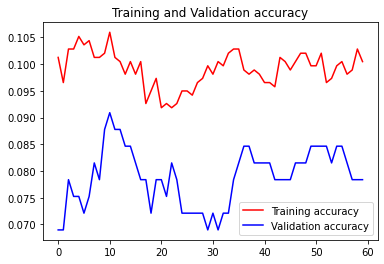

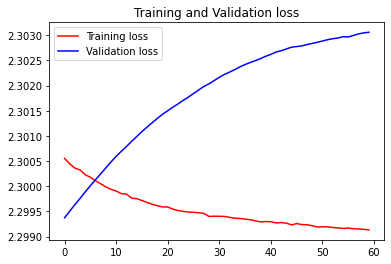

CPU times: user 1min 15s, sys: 1min 33s, total: 2min 48s
Wall time: 22.2 s


In [70]:
%%time
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, callbacks=callbacks1)

report(X_test, y_test, model1)
print_accuracy_loss(history1)

In [71]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                2570      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________


# Модель 2
## (2048, 1024, 512, 10), tanh-tanh-tanh-softmax, RandomNormal

In [72]:
initializer2 = tf.keras.initializers.RandomNormal()

In [73]:
architecture2_tanh = Architecture([("dense", 2048, "tanh"), ("dense", 1024, "tanh"), ("dense", 512, "tanh"), 
                              ("dense", 10, "softmax")])
parameters2_tanh = Parameters("model2_tanh", architecture2_tanh, initializer=initializer2)
model2_tanh, callbacks2_tanh = get_model(parameters2_tanh)

Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model2_tanh создана



Epoch 1/60
40/40 [==============================] - 2s 33ms/step - loss: 2.3029 - accuracy: 0.1100 - val_loss: 2.3041 - val_accuracy: 0.0784

Epoch 00001: saving model to checkpoints/model2_tanh.ckpt
Epoch 2/60
40/40 [==============================] - 1s 24ms/step - loss: 2.3019 - accuracy: 0.1044 - val_loss: 2.3044 - val_accuracy: 0.0784

Epoch 00002: saving model to checkpoints/model2_tanh.ckpt
Epoch 3/60
40/40 [==============================] - 1s 22ms/step - loss: 2.3033 - accuracy: 0.1065 - val_loss: 2.3064 - val_accuracy: 0.0784

Epoch 00003: saving model to checkpoints/model2_tanh.ckpt
Epoch 4/60
40/40 [==============================] - 1s 22ms/step - loss: 2.3016 - accuracy: 0.1158 - val_loss: 2.3052 - val_accuracy: 0.1348

Epoch 00004: saving model to checkpoints/model2_tanh.ckpt
Epoch 5/60
40/40 [==============================] - 1s 21ms/step - loss: 2.3015 - accuracy: 0.1154 - val_loss: 2.3038 - val_accuracy: 0.0909

Epoch 00005: saving model to checkpoints/model2_tanh.ckpt


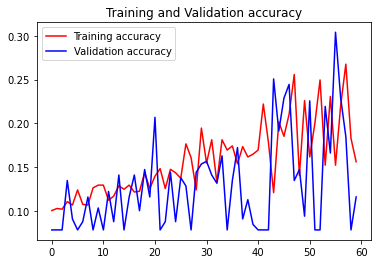

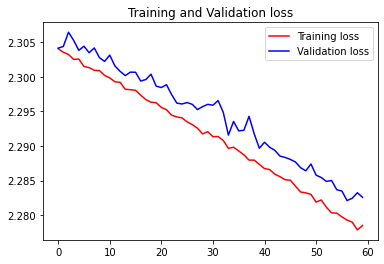

CPU times: user 5min 2s, sys: 4min 6s, total: 9min 8s
Wall time: 1min 20s


In [74]:
%%time
history2_tanh = model2_tanh.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, callbacks=callbacks2_tanh)

report(X_test, y_test, model2_tanh)
print_accuracy_loss(history2_tanh)

## (2048, 1024, 512, 10), relu-relu-relu-softmax, RandomNormal

In [75]:
%%time
architecture2_relu = Architecture([("dense", 2048, "relu"), ("dense", 1024, "relu"), ("dense", 512, "relu"), 
                              ("dense", 10, "softmax")])
parameters2_relu = Parameters("model2_relu", architecture2_relu, initializer=initializer2)
model2_relu, callbacks2_relu = get_model(parameters2_relu)

history2_relu = model2_relu.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                callbacks=callbacks2_relu, verbose=0)

Добавлен слой Dense(2048, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(512, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model2_relu создана


Epoch 00001: saving model to checkpoints/model2_relu.ckpt

Epoch 00002: saving model to checkpoints/model2_relu.ckpt

Epoch 00003: saving model to checkpoints/model2_relu.ckpt

Epoch 00004: saving model to checkpoints/model2_relu.ckpt

Epoch 00005: saving model to checkpoints/model2_relu.ckpt

Epoch 00006: saving model to checkpoints/model2_relu.ckpt

Epoch 00007: saving model to checkpoints/model2_relu.ckpt

Epoch 00008: saving model to checkpoints/model2_relu.ckpt

Epoch 00009: saving model to checkpoints/model2_relu.ckpt

Epoch 00010: saving model to checkpoints/model2_relu.ckpt

Epoch 00011: saving model to checkpoints/model2_relu.ckpt

Epoch 00012: saving model to checkpoints/model2_re

              precision    recall  f1-score   support

           0       0.08      1.00      0.15        25
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        34
           3       1.00      0.07      0.13        29
           4       0.40      0.15      0.22        27
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        35

    accuracy                           0.10       319
   macro avg       0.15      0.12      0.05       319
weighted avg       0.13      0.10      0.04       319



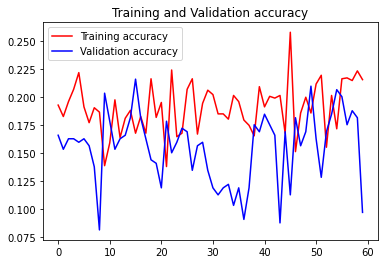

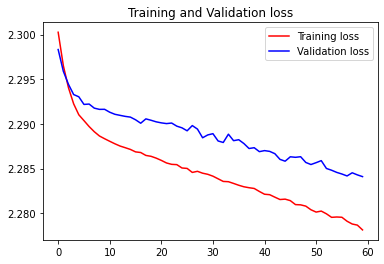

CPU times: user 1.58 s, sys: 1.12 s, total: 2.69 s
Wall time: 707 ms


In [76]:
%%time
report(X_test, y_test, model2_relu)
print_accuracy_loss(history2_relu)

# Модель 3. Glorot + tanh

## (2048, 1024, 512, 10), tanh-tanh-tanh-softmax, GlorotNormal

Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model3_normal создана


Epoch 00001: saving model to checkpoints/model3_normal.ckpt

Epoch 00002: saving model to checkpoints/model3_normal.ckpt

Epoch 00003: saving model to checkpoints/model3_normal.ckpt

Epoch 00004: saving model to checkpoints/model3_normal.ckpt

Epoch 00005: saving model to checkpoints/model3_normal.ckpt

Epoch 00006: saving model to checkpoints/model3_normal.ckpt

Epoch 00007: saving model to checkpoints/model3_normal.ckpt

Epoch 00008: saving model to checkpoints/model3_normal.ckpt

Epoch 00009: saving model to checkpoints/model3_normal.ckpt

Epoch 00010: saving model to checkpoints/model3_normal.ckpt

Epoch 00011: saving model to checkpoints/model3_normal.ckpt

Epoch 00012: saving model 

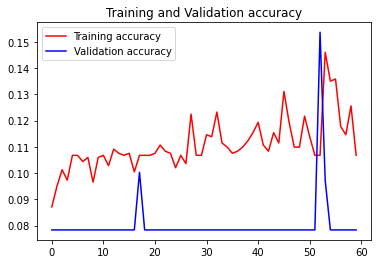

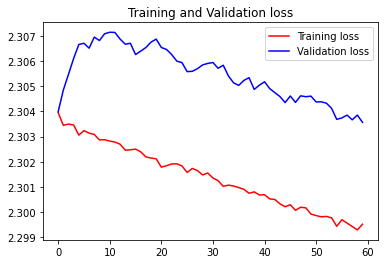

CPU times: user 4min 58s, sys: 3min 57s, total: 8min 55s
Wall time: 1min 20s


In [77]:
%%time
architecture3_normal = Architecture([("dense", 2048, "tanh"), ("dense", 1024, "tanh"), ("dense", 512, "tanh"), 
                              ("dense", 10, "softmax")])
initializer3_normal = tf.keras.initializers.GlorotNormal()
parameters3_normal = Parameters("model3_normal", architecture3_normal, initializer=initializer3_normal)
model3_normal, callbacks3_normal = get_model(parameters3_normal)
history3_normal = model3_normal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks3_normal, verbose=0)

report(X_test, y_test, model3_normal)
print_accuracy_loss(history3_normal)

## (2048, 1024, 512, 10), tanh-tanh-tanh-softmax, GlorotUniform

Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model3_uniform создана

Epoch 1/60
40/40 [==============================] - 2s 35ms/step - loss: 2.3036 - accuracy: 0.0924 - val_loss: 2.3045 - val_accuracy: 0.0784

Epoch 00001: saving model to checkpoints/model3_uniform.ckpt
Epoch 2/60
40/40 [==============================] - 1s 22ms/step - loss: 2.3019 - accuracy: 0.1302 - val_loss: 2.3049 - val_accuracy: 0.0564

Epoch 00002: saving model to checkpoints/model3_uniform.ckpt
Epoch 3/60
40/40 [==============================] - 1s 24ms/step - loss: 2.3026 - accuracy: 0.1153 - val_loss: 2.3056 - val_accuracy: 0.0784

Epoch 00003: saving model to checkpoints/model3_uniform.ckpt
Epoch 4/60
40/40 [==============================] - 1s 25ms/step - loss: 2.3033 - accura

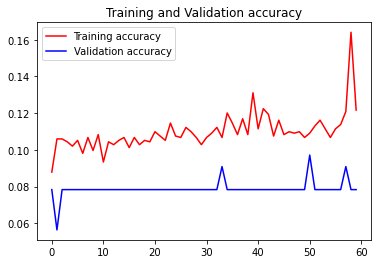

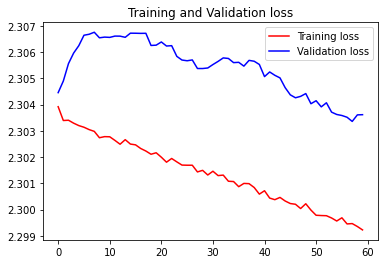

CPU times: user 5min 6s, sys: 4min 4s, total: 9min 10s
Wall time: 1min 22s


In [78]:
%%time
architecture3_uniform = Architecture([("dense", 2048, "tanh"), ("dense", 1024, "tanh"), ("dense", 512, "tanh"), 
                              ("dense", 10, "softmax")])
initializer3_uniform = tf.keras.initializers.GlorotNormal()
parameters3_uniform = Parameters("model3_uniform", architecture3_uniform, initializer=initializer3_uniform)
model3_uniform, callbacks3_uniform = get_model(parameters3_uniform)
history3_uniform = model3_uniform.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks3_uniform)

report(X_test, y_test, model3_uniform)
print_accuracy_loss(history3_uniform)

# Модель 4. He + Relu

## (2048, 1024, 512, 10), relu-relu-relu-softmax, HeNormal

Добавлен слой Dense(2048, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(512, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model4_normal создана

Epoch 1/60
40/40 [==============================] - 2s 30ms/step - loss: 2.3017 - accuracy: 0.1577 - val_loss: 2.2992 - val_accuracy: 0.4201

Epoch 00001: saving model to checkpoints/model4_normal.ckpt
Epoch 2/60
40/40 [==============================] - 1s 18ms/step - loss: 2.2982 - accuracy: 0.3808 - val_loss: 2.2971 - val_accuracy: 0.3511

Epoch 00002: saving model to checkpoints/model4_normal.ckpt
Epoch 3/60
40/40 [==============================] - 1s 19ms/step - loss: 2.2956 - accuracy: 0.4002 - val_loss: 2.2952 - val_accuracy: 0.2602

Epoch 00003: saving model to checkpoints/model4_normal.ckpt
Epoch 4/60
40/40 [==============================] - 1s 19ms/step - loss: 2.2927 - accuracy: 

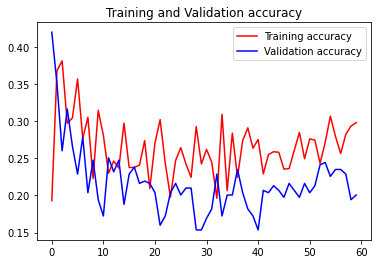

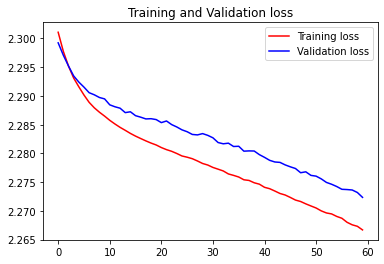

CPU times: user 4min 38s, sys: 3min 53s, total: 8min 32s
Wall time: 1min 16s


In [79]:
%%time
architecture4_normal = Architecture([("dense", 2048, "relu"), ("dense", 1024, "relu"), ("dense", 512, "relu"), 
                              ("dense", 10, "softmax")])
initializer4_normal = tf.keras.initializers.HeNormal()
parameters4_normal = Parameters("model4_normal", architecture4_normal, initializer=initializer4_normal)
model4_normal, callbacks4_normal = get_model(parameters4_normal)
history4_normal = model4_normal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks4_normal)

report(X_test, y_test, model4_normal)
print_accuracy_loss(history4_normal)

## (2048, 1024, 512, 10), relu-relu-relu-softmax, HeUniform

Добавлен слой Dense(2048, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(512, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model4_uniform создана

Epoch 1/60
40/40 [==============================] - 2s 32ms/step - loss: 2.3016 - accuracy: 0.1712 - val_loss: 2.2994 - val_accuracy: 0.3009

Epoch 00001: saving model to checkpoints/model4_uniform.ckpt
Epoch 2/60
40/40 [==============================] - 1s 22ms/step - loss: 2.2985 - accuracy: 0.3160 - val_loss: 2.2970 - val_accuracy: 0.3009

Epoch 00002: saving model to checkpoints/model4_uniform.ckpt
Epoch 3/60
40/40 [==============================] - 1s 23ms/step - loss: 2.2959 - accuracy: 0.3226 - val_loss: 2.2953 - val_accuracy: 0.3072

Epoch 00003: saving model to checkpoints/model4_uniform.ckpt
Epoch 4/60
40/40 [==============================] - 1s 22ms/step - loss: 2.2939 - accura

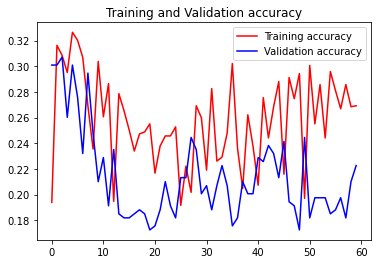

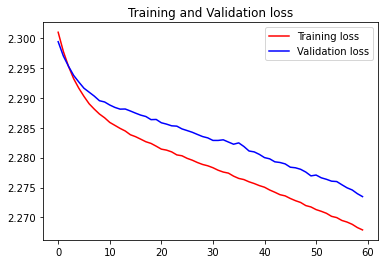

CPU times: user 4min 52s, sys: 3min 59s, total: 8min 51s
Wall time: 1min 18s


In [80]:
%%time
architecture4_uniform = Architecture([("dense", 2048, "relu"), ("dense", 1024, "relu"), ("dense", 512, "relu"), 
                              ("dense", 10, "softmax")])
initializer4_uniform = tf.keras.initializers.HeUniform()
parameters4_uniform = Parameters("model4_uniform", architecture4_uniform, initializer=initializer4_uniform)
model4_uniform, callbacks4_uniform = get_model(parameters4_uniform)
history4_uniform = model4_uniform.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks4_uniform)

report(X_test, y_test, model4_uniform)
print_accuracy_loss(history4_uniform)

## Лучше остальных оказалась модель model4_uniform - (2048, 1024, 512, 10), relu-relu-relu-softmax, HeUniform
## Попробую поменять скорость обучения SGD

## Увеличиваю в 10 раз (до 0.1)

Добавлен слой Dense(2048, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(512, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model4_sgd создана

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.00      0.00      0.00        34
           2       1.00      0.03      0.06        34
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        33
           8       0.19      0.71      0.30        31
           9       0.19      0.97      0.31        35

    accuracy                           0.24       319
   macro avg       0.23      0.25      0.15       3

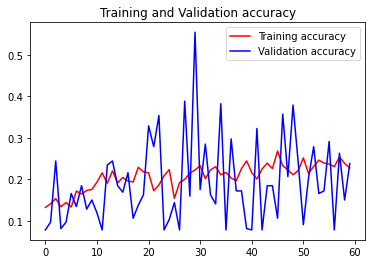

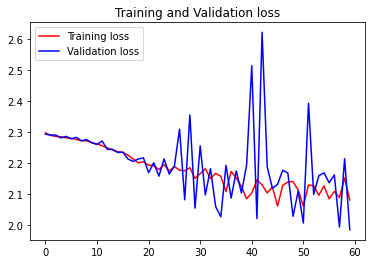

CPU times: user 3min 27s, sys: 2min 33s, total: 6min 1s
Wall time: 46.4 s


In [81]:
%%time
architecture4_sgd = Architecture([("dense", 2048, "relu"), ("dense", 1024, "relu"), ("dense", 512, "relu"), 
                              ("dense", 10, "softmax")])
initializer4_sgd = tf.keras.initializers.HeUniform()
optimizer4_sgd = tf.keras.optimizers.SGD(0.1)
parameters4_sgd = Parameters("model4_sgd", architecture4_sgd, initializer=initializer4_sgd, 
                             optimizer=optimizer4_sgd, has_callbacks=False)
model4_sgd, callbacks4_sgd = get_model(parameters4_sgd)
history4_sgd = model4_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                              callbacks=callbacks4_sgd, verbose=0)

report(X_test, y_test, model4_sgd)
print_accuracy_loss(history4_sgd)

## Уменьшаю в 10 раз (до 0.001)

Добавлен слой Dense(2048, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(512, activation=relu, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model4_sgd2 создана

              precision    recall  f1-score   support

           0       0.18      1.00      0.30        25
           1       0.62      0.15      0.24        34
           2       0.00      0.00      0.00        34
           3       0.66      0.72      0.69        29
           4       0.19      0.85      0.31        27
           5       0.79      0.35      0.49        31
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        35

    accuracy                           0.27       319
   macro avg       0.24      0.31      0.20       

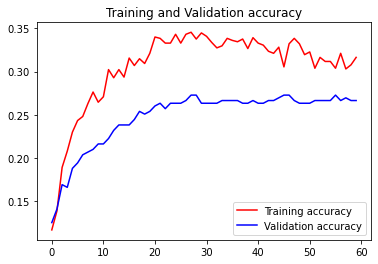

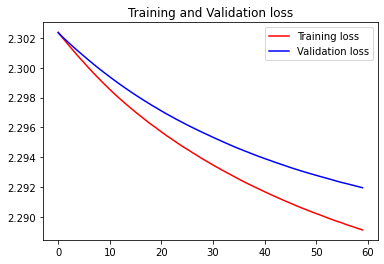

CPU times: user 3min 23s, sys: 2min 28s, total: 5min 52s
Wall time: 45.5 s


In [82]:
%%time
architecture4_sgd2 = Architecture([("dense", 2048, "relu"), ("dense", 1024, "relu"), ("dense", 512, "relu"), 
                              ("dense", 10, "softmax")])
initializer4_sgd2 = tf.keras.initializers.HeUniform()
optimizer4_sgd2 = tf.keras.optimizers.SGD(0.001)
parameters4_sgd2 = Parameters("model4_sgd2", architecture4_sgd2, initializer=initializer4_sgd2, 
                             optimizer=optimizer4_sgd2, has_callbacks=False)
model4_sgd2, callbacks4_sgd2 = get_model(parameters4_sgd2)
history4_sgd2 = model4_sgd2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                              callbacks=callbacks4_sgd2, verbose=0)


report(X_test, y_test, model4_sgd2)
print_accuracy_loss(history4_sgd2)

# Модель 5. LeakyRelu

Добавлен слой Dense(2048, kernel_regularizer=None)
Добавлен слой LeakyRelu
Добавлен слой Dense(1024, kernel_regularizer=None)
Добавлен слой LeakyRelu
Добавлен слой Dense(512, kernel_regularizer=None)
Добавлен слой LeakyRelu
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model5_leaky_relu создана

Epoch 1/60
40/40 [==============================] - 2s 28ms/step - loss: 2.3020 - accuracy: 0.1264 - val_loss: 2.3025 - val_accuracy: 0.1097
Epoch 2/60
40/40 [==============================] - 1s 19ms/step - loss: 2.3017 - accuracy: 0.1356 - val_loss: 2.3022 - val_accuracy: 0.1348
Epoch 3/60
40/40 [==============================] - 1s 17ms/step - loss: 2.3013 - accuracy: 0.1451 - val_loss: 2.3019 - val_accuracy: 0.1693
Epoch 4/60
40/40 [==============================] - 1s 20ms/step - loss: 2.3011 - accuracy: 0.1534 - val_loss: 2.3016 - val_accuracy: 0.1787
Epoch 5/60
40/40 [==============================] - 1s 21ms/step - loss: 2.3004 - accuracy: 0.1670 - val_loss

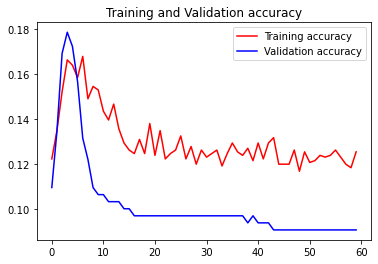

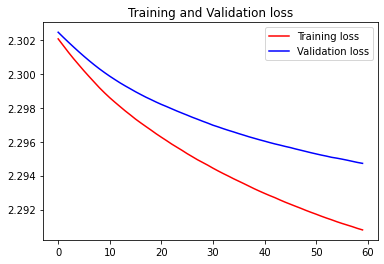

CPU times: user 3min 40s, sys: 3min, total: 6min 41s
Wall time: 51.8 s


In [84]:
%%time
architecture5_leaky_relu = Architecture([(Constants.DENSE, 2048), (Constants.LEAKY_RELU,),
                                         (Constants.DENSE, 1024), (Constants.LEAKY_RELU,),
                                         (Constants.DENSE, 512), (Constants.LEAKY_RELU,),
                                         (Constants.DENSE, 10, "softmax")])
initializer5_leaky_relu = tf.keras.initializers.HeUniform()
optimizer5_leaky_relu = tf.keras.optimizers.SGD(0.001)
parameters5_leaky_relu = Parameters("model5_leaky_relu", architecture5_leaky_relu, 
                                    initializer=initializer5_leaky_relu, 
                                    optimizer=optimizer5_leaky_relu, has_callbacks=False)
model5_leaky_relu, callbacks5_leaky_relu = get_model(parameters5_leaky_relu)

history5_leaky_relu = model5_leaky_relu.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                              callbacks=callbacks5_leaky_relu)

report(X_test, y_test, model5_leaky_relu)
print_accuracy_loss(history5_leaky_relu)

# Модель 6. model4_normal + Adam

Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=None)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=None)
Модель model6_adam создана


Epoch 00001: saving model to checkpoints/model6_adam.ckpt

Epoch 00002: saving model to checkpoints/model6_adam.ckpt

Epoch 00003: saving model to checkpoints/model6_adam.ckpt

Epoch 00004: saving model to checkpoints/model6_adam.ckpt

Accuracy > 0.9. Finish!
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.86      0.74      0.79        34
           2       0.72      1.00      0.84        34
           3       0.95      0.69      0.80        29
           4       0.95      0.74      0.83        27
           5       0.88      0.97      0.92        31
           6       0.97      0.97      0.97        40
      

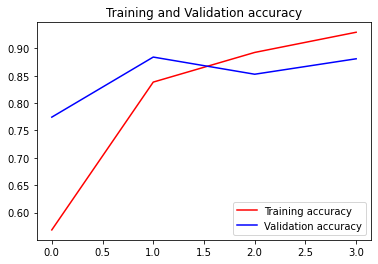

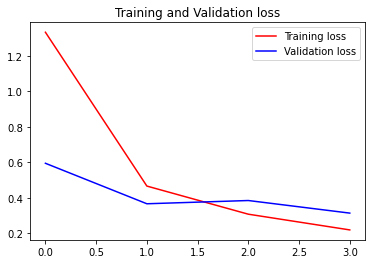

CPU times: user 26.7 s, sys: 20.2 s, total: 47 s
Wall time: 8.2 s


In [85]:
%%time
architecture6_adam = Architecture([("dense", 2048, "tanh"), ("dense", 1024, "tanh"), ("dense", 512, "tanh"), 
                              ("dense", 10, "softmax")])
initializer6_adam = tf.keras.initializers.HeNormal()
optimizer6_adam = tf.keras.optimizers.Adam()
parameters6_adam = Parameters("model6_adam", architecture6_adam, initializer=initializer6_adam, 
                                 optimizer=optimizer6_adam)
model6_adam, callbacks6_adam = get_model(parameters6_adam)
history6_adam = model6_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, 
                                    callbacks=callbacks6_adam, verbose=0)

report(X_test, y_test, model6_adam)
print_accuracy_loss(history6_adam)

# Модель 7. model6_adam + Batch Normalization + L2

Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b0c18f820>)
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b0c18f820>)
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b0c18f820>)
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b0c18f820>)
Модель model7 создана

Epoch 1/60
40/40 [==============================] - 3s 49ms/step - loss: 7.8217 - accuracy: 0.2280 - val_loss: 4.1111 - val_accuracy: 0.6270

Epoch 00001: saving model to checkpoints/model7.ckpt
Epoch 2/60
40/40 [==============================] - 1s 36ms/step - loss: 3.5051 - accuracy: 0.7090 - val_loss: 2.4236 - val_accuracy: 0.8056

Epoch 00002: saving model to checkpoints/model7.ckpt
Epoch 3/60
40/40 [==============================] - 2s 40ms/step - 

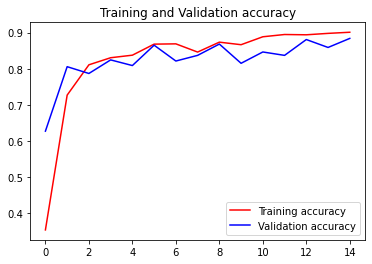

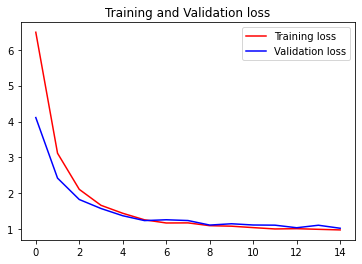

CPU times: user 1min 52s, sys: 1min 25s, total: 3min 18s
Wall time: 30.7 s


In [86]:
%%time
architecture7 = Architecture([(Constants.BATCH_NORM), (Constants.DENSE, 2048, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DENSE, 1024, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DENSE, 512, "tanh"),
                              (Constants.BATCH_NORM), (Constants.DENSE, 10, "softmax")])
initializer7 = tf.keras.initializers.HeNormal()
optimizer7 = tf.keras.optimizers.Adam()
regularization7 = tf.keras.regularizers.L2(0.001)
parameters7 = Parameters("model7", architecture7, initializer=initializer7, optimizer=optimizer7, 
                         kernel_regularizer=regularization7)
model7, callbacks7 = get_model(parameters7)
history7 = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks7, verbose=1)

report(X_test, y_test, model7)
print_accuracy_loss(history7)

# Модель 8. Dropout

Добавлен слой Dropout
Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b04194d60>)
Добавлен слой Dropout
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b04194d60>)
Добавлен слой Dropout
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b04194d60>)
Добавлен слой Dropout
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b04194d60>)
Модель model8 создана

Epoch 1/60
40/40 [==============================] - 3s 52ms/step - loss: 7.9277 - accuracy: 0.2397 - val_loss: 4.3417 - val_accuracy: 0.5298

Epoch 00001: saving model to checkpoints/model8.ckpt
Epoch 2/60
40/40 [==============================] - 2s 41ms/step - loss: 3.8114 - accuracy: 0.6083 - val_loss: 2.7576 - val_accuracy: 0.6583

Epoch 00002: saving model to che

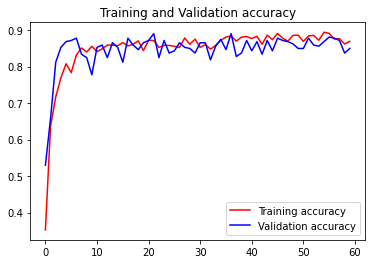

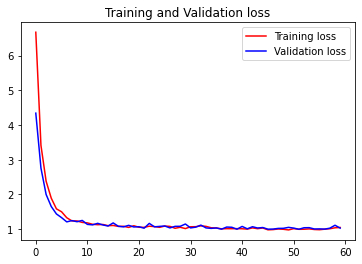

CPU times: user 7min 47s, sys: 6min 9s, total: 13min 57s
Wall time: 2min 4s


In [87]:
%%time
architecture8 = Architecture([(Constants.BATCH_NORM), (Constants.DROPOUT, 0.2), (Constants.DENSE, 2048, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.2), (Constants.DENSE, 1024, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.2), (Constants.DENSE, 512, "tanh"),
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.2), (Constants.DENSE, 10, "softmax")])
initializer8 = tf.keras.initializers.HeNormal()
optimizer8 = tf.keras.optimizers.Adam()
regularization8 = tf.keras.regularizers.L2(0.001)
parameters8 = Parameters("model8", architecture8, initializer=initializer8, optimizer=optimizer8, 
                         kernel_regularizer=regularization8)
model8, callbacks8 = get_model(parameters8)
history8 = model8.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks8, verbose=1)

report(X_test, y_test, model8)
print_accuracy_loss(history8)

# Модель 9. L1 + dropout

Добавлен слой Dropout
Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L1 object at 0x7f8b0c2c5370>)
Добавлен слой Dropout
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L1 object at 0x7f8b0c2c5370>)
Добавлен слой Dropout
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L1 object at 0x7f8b0c2c5370>)
Добавлен слой Dropout
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=<tensorflow.python.keras.regularizers.L1 object at 0x7f8b0c2c5370>)
Модель model9 создана

Epoch 1/60
40/40 [==============================] - 3s 59ms/step - loss: 11.8010 - accuracy: 0.1721 - val_loss: 7.9524 - val_accuracy: 0.3323

Epoch 00001: saving model to checkpoints/model9.ckpt
Epoch 2/60
40/40 [==============================] - 2s 46ms/step - loss: 7.1172 - accuracy: 0.2880 - val_loss: 5.1602 - val_accuracy: 0.4138

Epoch 00002: saving model to ch

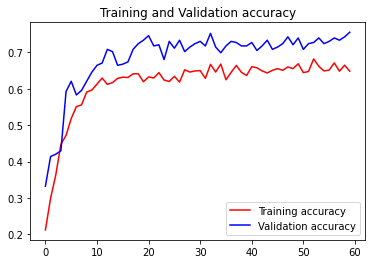

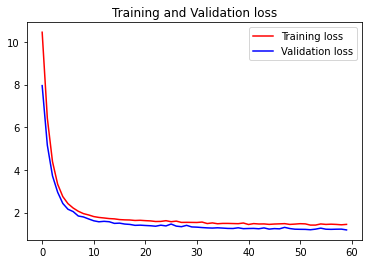

CPU times: user 8min 19s, sys: 6min 31s, total: 14min 50s
Wall time: 2min 10s


In [94]:
%%time
architecture9 = Architecture([(Constants.BATCH_NORM), (Constants.DROPOUT, 0.5), (Constants.DENSE, 2048, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.5), (Constants.DENSE, 1024, "tanh"), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.5), (Constants.DENSE, 512, "tanh"),
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.5), (Constants.DENSE, 10, "softmax")])
initializer9 = tf.keras.initializers.HeNormal()
optimizer9 = tf.keras.optimizers.Adam()
regularization9 = tf.keras.regularizers.L1(0.0001)
parameters9 = Parameters("model9", architecture9, initializer=initializer9, optimizer=optimizer9, 
                         kernel_regularizer=regularization9)
model9, callbacks9 = get_model(parameters9)
history9 = model9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks9, verbose=1)

report(X_test, y_test, model9)
print_accuracy_loss(history9)

# Модель 10. dropout + max норма

Добавлен слой Dropout
Добавлен слой Dense(2048, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b52b82610>, max_norm=1)
Добавлен слой Dropout
Добавлен слой Dense(1024, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b52b82610>, max_norm=1)
Добавлен слой Dropout
Добавлен слой Dense(512, activation=tanh, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b52b82610>, max_norm=1)
Добавлен слой Dropout
Добавлен слой Dense(10, activation=softmax, kernel_regularizer=<tensorflow.python.keras.regularizers.L2 object at 0x7f8b52b82610>, max_norm=1)
Модель model10 создана

Epoch 1/60
40/40 [==============================] - 4s 68ms/step - loss: 5.3891 - accuracy: 0.1334 - val_loss: 3.1490 - val_accuracy: 0.2821

Epoch 00001: saving model to checkpoints/model10.ckpt
Epoch 2/60
40/40 [==============================] - 2s 41ms/step - loss: 2.8063 - accuracy: 0.3047 - val_loss: 2.0541 - val_

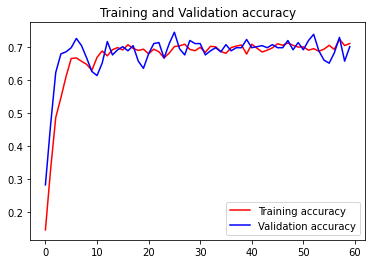

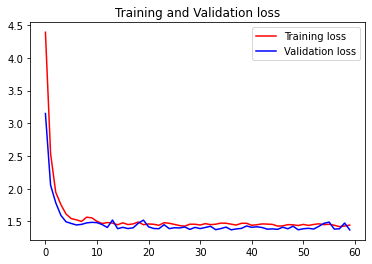

CPU times: user 8min 55s, sys: 7min 3s, total: 15min 59s
Wall time: 2min 20s


In [88]:
%%time
architecture10 = Architecture([(Constants.BATCH_NORM), (Constants.DROPOUT, 0.3), (Constants.DENSE, 2048, "tanh", 1), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.3), (Constants.DENSE, 1024, "tanh", 1), 
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.3), (Constants.DENSE, 512, "tanh", 1),
                              (Constants.BATCH_NORM), (Constants.DROPOUT, 0.3), (Constants.DENSE, 10, "softmax", 1)])
initializer10 = tf.keras.initializers.HeNormal()
optimizer10 = tf.keras.optimizers.Adam()
regularization10 = tf.keras.regularizers.L2(0.001)
parameters10 = Parameters("model10", architecture10, initializer=initializer10, optimizer=optimizer10, 
                         kernel_regularizer=regularization10)
model10, callbacks10 = get_model(parameters10)
history10 = model10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, 
                                    callbacks=callbacks10, verbose=1)

report(X_test, y_test, model10)
print_accuracy_loss(history10)

In [89]:
model10.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 2048)              526336    
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)             

# F1-score

In [355]:
output_dict = report(X_test, y_test, model10, output_dict=True)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.67      0.71      0.69        31
           2       0.65      0.73      0.69        33
           3       0.73      0.90      0.81        30
           4       0.94      0.87      0.91        39
           5       0.80      0.65      0.71        31
           6       0.89      0.86      0.88        37
           7       0.66      0.70      0.68        30
           8       0.60      0.52      0.56        29
           9       0.69      0.65      0.67        31

    accuracy                           0.76       319
   macro avg       0.75      0.75      0.75       319
weighted avg       0.76      0.76      0.75       319



In [103]:
report(X_test, y_test, model1, output_dict=True)['accuracy']

              precision    recall  f1-score   support

           0       0.08      0.56      0.15        25
           1       0.55      0.18      0.27        34
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        29
           4       0.02      0.07      0.03        27
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        40
           7       1.00      0.09      0.17        33
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        35

    accuracy                           0.08       319
   macro avg       0.16      0.09      0.06       319
weighted avg       0.17      0.08      0.06       319



0.07836990595611286

In [104]:
%%capture
f1_score = {"model1": report(X_test, y_test, model1, output_dict=True)['macro avg']['f1-score'],
            "model2_relu": report(X_test, y_test, model2_relu, output_dict=True)['macro avg']['f1-score'],
            "model2_tanh": report(X_test, y_test, model2_tanh, output_dict=True)['macro avg']['f1-score'],
            "model3_normal": report(X_test, y_test, model3_normal, output_dict=True)['macro avg']['f1-score'], 
            "model3_uniform": report(X_test, y_test, model3_uniform, output_dict=True)['macro avg']['f1-score'],
            "model4_normal": report(X_test, y_test, model4_normal, output_dict=True)['macro avg']['f1-score'], 
            "model4_uniform": report(X_test, y_test, model4_uniform, output_dict=True)['macro avg']['f1-score'],
            "model5_leaky_relu": report(X_test, y_test, model5_leaky_relu, output_dict=True)['macro avg']['f1-score'],
            "model6_adam": report(X_test, y_test, model6_adam, output_dict=True)['macro avg']['f1-score'],
            "model7": report(X_test, y_test, model7, output_dict=True)['macro avg']['f1-score'],
            "model8": report(X_test, y_test, model8, output_dict=True)['macro avg']['f1-score'],
            "model9": report(X_test, y_test, model9, output_dict=True)['macro avg']['f1-score'],
            "model10": report(X_test, y_test, model10, output_dict=True)['macro avg']['f1-score']}
accuracy_score = {"model1": report(X_test, y_test, model1, output_dict=True)['accuracy'],
            "model2_relu": report(X_test, y_test, model2_relu, output_dict=True)['accuracy'],
            "model2_tanh": report(X_test, y_test, model2_tanh, output_dict=True)['accuracy'],
            "model3_normal": report(X_test, y_test, model3_normal, output_dict=True)['accuracy'], 
            "model3_uniform": report(X_test, y_test, model3_uniform, output_dict=True)['accuracy'],
            "model4_normal": report(X_test, y_test, model4_normal, output_dict=True)['accuracy'], 
            "model4_uniform": report(X_test, y_test, model4_uniform, output_dict=True)['accuracy'],
            "model5_leaky_relu": report(X_test, y_test, model5_leaky_relu, output_dict=True)['accuracy'],
            "model6_adam": report(X_test, y_test, model6_adam, output_dict=True)['accuracy'],
            "model7": report(X_test, y_test, model7, output_dict=True)['accuracy'],
            "model8": report(X_test, y_test, model8, output_dict=True)['accuracy'],
            "model9": report(X_test, y_test, model9, output_dict=True)['accuracy'],
            "model10": report(X_test, y_test, model10, output_dict=True)['accuracy']}

In [112]:
print("f1" + "\t\t\t\t" + "accuracy")
for temp in f1_score.keys():
    print(str(f1_score[temp]) + "\t\t" + str(accuracy_score[temp]))

f1				accuracy
0.060583333333333336		0.07836990595611286
0.049585088391928656		0.09717868338557993
0.06547311642853045		0.11598746081504702
0.014534883720930234		0.07836990595611286
0.014534883720930234		0.07836990595611286
0.1515887279047497		0.2006269592476489
0.15770452012958874		0.2225705329153605
0.03894830659536542		0.09090909090909091
0.8784693081200965		0.8808777429467085
0.8843715893097205		0.8840125391849529
0.8508903498153705		0.8495297805642633
0.7601535157207775		0.7554858934169278
0.7048520102063868		0.7021943573667712


# Как видно, наилучшее значение метрики F1 у модели model7, то есть у модели с инициализацией весов HeNormal, регуляризацией L2(0.001), батч нормализацией перед каждый слоем и оптимизатором Адам

In [187]:
def get_digit(image):
    print(np.argmax(model7.predict_proba(np.array([image]))))

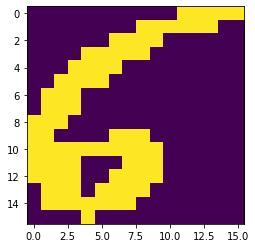

In [188]:
plt.imshow(X_test[87].reshape(16, 16))

In [189]:
get_digit(X_test[87])

6


In [209]:
my_digit7 = [[0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]

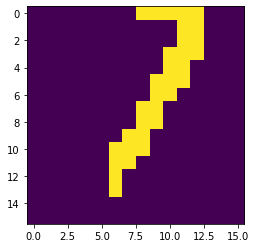

In [210]:
plt.imshow(my_digit7)

In [211]:
get_digit(np.array(my_digit7).reshape(256, ))

7


In [212]:
my_digit8 = [[0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
            [0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]

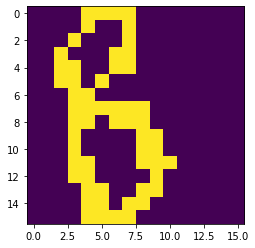

In [213]:
plt.imshow(my_digit8)

In [214]:
get_digit(np.array(my_digit8).reshape(256, ))

8


In [228]:
my_digit6 = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]]

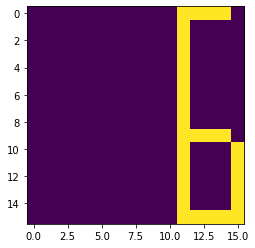

In [229]:
plt.imshow(my_digit6)

In [230]:
get_digit(np.array(my_digit6).reshape(256, ))

9


In [250]:
my_digi11 = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
            [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
            [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
            [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]]

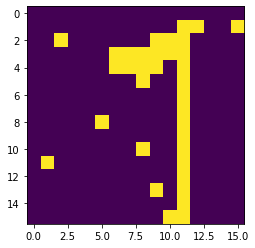

In [251]:
plt.imshow(my_digi11)

In [252]:
get_digit(np.array(my_digi11).reshape(256, ))

1
